In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("Churn_Modelling.csv")

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df["Exited"].unique()

array([1, 0], dtype=int64)

# Taget = EXITED

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.shape

(10000, 14)

In [8]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df.duplicated().sum()

0

# Seprate X and Y

In [10]:
x = df.drop(columns=["RowNumber","Exited"])
y = df[["Exited"]]

In [11]:
x.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [12]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [13]:
y.value_counts()

Exited
0         7963
1         2037
Name: count, dtype: int64

<Axes: xlabel='Exited'>

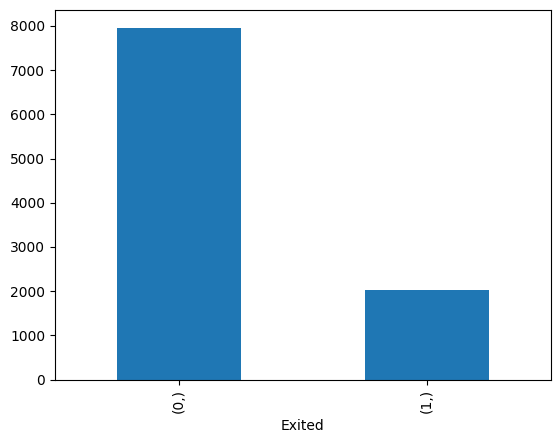

In [14]:
y.value_counts().plot(kind='bar')

## Pre processing

In [15]:
x.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object

In [16]:
cat = list(x.columns[x.dtypes=="object"])
con = list(x.columns[x.dtypes!="object"])

In [17]:
cat

['Surname', 'Geography', 'Gender']

In [18]:
con

['CustomerId',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [20]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

In [21]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore",sparse_output=False,drop="first")
)

In [22]:
pre = ColumnTransformer(
    [
        ("num",num_pipe,con),
        ("cat",cat_pipe,cat),
    ]
).set_output(transform="pandas")

In [23]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['CustomerId', 'CreditScore', 'Age', 'Tenure',
                                  'Balance', 'NumOfProducts', 'HasCrCard',
                                  'IsActiveMember', 'EstimatedSalary']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Surname', 'Geography', 'Gender'])])

In [24]:
x_pre = pre.fit_transform(x)
x_pre[:5]

,num__CustomerId,num__CreditScore,num__Age,num__Tenure,num__Balance,num__NumOfProducts,num__HasCrCard,num__IsActiveMember,num__EstimatedSalary,cat__Surname_Abbie,...,cat__Surname_Zotova,cat__Surname_Zox,cat__Surname_Zubarev,cat__Surname_Zubareva,cat__Surname_Zuev,cat__Surname_Zuyev,cat__Surname_Zuyeva,cat__Geography_Germany,cat__Geography_Spain,cat__Gender_Male
0,-0.783213,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.606534,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.995885,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.144767,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.652659,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [25]:
x_pre.shape

(10000, 2943)

# train test split

In [26]:
from sklearn.model_selection import train_test_split

xtrain , xtest , ytrain , ytest = train_test_split(x_pre,y,test_size=0.2,random_state=42)

In [27]:
xtrain.head()

,num__CustomerId,num__CreditScore,num__Age,num__Tenure,num__Balance,num__NumOfProducts,num__HasCrCard,num__IsActiveMember,num__EstimatedSalary,cat__Surname_Abbie,...,cat__Surname_Zotova,cat__Surname_Zox,cat__Surname_Zubarev,cat__Surname_Zubareva,cat__Surname_Zuev,cat__Surname_Zuyev,cat__Surname_Zuyeva,cat__Geography_Germany,cat__Geography_Spain,cat__Gender_Male
9254,-1.248733,0.367013,-0.660018,0.341352,-1.225848,0.807737,0.646092,0.970243,1.373784,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1561,1.048668,-0.191713,0.293517,-0.350204,0.691389,0.807737,0.646092,0.970243,1.667407,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1670,0.362192,-0.947028,-1.422847,-0.695982,0.613102,-0.911583,0.646092,-1.030670,-0.246910,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
6087,0.553552,-0.926334,-1.136786,1.378686,0.948021,-0.911583,0.646092,-1.030670,0.921446,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6669,1.486940,-1.381593,1.628468,1.378686,1.052363,-0.911583,-1.547768,-1.030670,-1.053812,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [28]:
ytrain.head()

,Exited
9254,0
1561,0
1670,1
6087,1
6669,1


In [29]:
xtrain.shape

(8000, 2943)

In [30]:
xtest.shape

(2000, 2943)

# model building and tuning

In [31]:
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier(
    n_estimators=1,
    max_depth=1,
    min_samples_split=5,
    min_samples_leaf=6,
    criterion="gini"
)

In [32]:
model1.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=1, min_samples_leaf=6, min_samples_split=5,
                       n_estimators=1)

In [33]:
model1.score(xtrain,ytrain)

0.7945

In [34]:
model1.score(xtest,ytest)

0.8035

In [35]:
from sklearn.metrics import f1_score

In [36]:
ypred_test = model1.predict(xtest)
f1_test = f1_score(ytest,ypred_test,average="macro")

In [37]:
f1_test

0.4455225949542556

# need to improve score

# Tune the model with Randomized search Cv

In [38]:
params1 = {
    "n_estimators" : [50,100,200,300],
    "max_depth":[3,4,5,6],
    "min_samples_split":[5,6,7,8]
}

In [39]:
from sklearn.model_selection import RandomizedSearchCV

base_rf = RandomForestClassifier()
rscv_rf = RandomizedSearchCV(base_rf,param_distributions=params1,scoring="f1_macro",cv=5,n_jobs=-1)
rscv_rf.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [3, 4, 5, 6],
                                        'min_samples_split': [5, 6, 7, 8],
                                        'n_estimators': [50, 100, 200, 300]},
                   scoring='f1_macro')

In [40]:
rscv_rf.best_score_

0.442741699969632

In [41]:
best_rf = rscv_rf.best_estimator_
best_rf

RandomForestClassifier(max_depth=6, min_samples_split=6)

In [42]:
best_rf.score(xtrain,ytrain)

0.7945

In [43]:
best_rf.score(xtest,ytest)

0.8035

# GRADIENT BOOSTING

In [44]:
from sklearn.ensemble import GradientBoostingClassifier


In [46]:
model2 = GradientBoostingClassifier(
    learning_rate=0.2,
    n_estimators=1,
    max_depth=1,
    min_samples_split=5,
    min_samples_leaf=6
)
model2.fit(xtrain,ytrain)

GradientBoostingClassifier(learning_rate=0.2, max_depth=1, min_samples_leaf=6,
                           min_samples_split=5, n_estimators=1)

In [47]:
model2.score(xtrain,ytrain)

0.7945

In [48]:
model2.score(xtest,ytest)

0.8035

In [49]:
ypred_test2 = model2.predict(xtest)
ypred_test2[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [50]:
ytest.head()

,Exited
6252,0
4684,0
1731,0
4742,0
4521,0


In [52]:
f1_2 = f1_score(ytest,ypred_test2,average="macro")
f1_2

0.4455225949542556

# TUNING

In [54]:
params2 = {
    "learning_rate" : [0.1,0.2],
    "n_estimators":[200,300],
    "max_depth":[3,4,5]
}

In [55]:
base_gb = GradientBoostingClassifier()

rscv_gb = RandomizedSearchCV(base_gb,param_distributions=params2,cv=5,scoring="f1_macro",n_jobs=-1)

rscv_gb.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.2],
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': [200, 300]},
                   scoring='f1_macro')

In [56]:
rscv_gb.best_estimator_

GradientBoostingClassifier(max_depth=5, n_estimators=300)

In [57]:
rscv_gb.best_score_

0.7483215224409763

In [58]:
best_gb=rscv_gb.best_estimator_
best_gb

GradientBoostingClassifier(max_depth=5, n_estimators=300)

In [59]:
best_gb.score(xtrain,ytrain)

0.9085

In [60]:
best_gb.score(xtest,ytest)

0.864

In [63]:
ypred_test_gb = best_gb.predict(xtest)
ypred_test_gb[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [64]:
ytest.head(10)

,Exited
6252,0
4684,0
1731,0
4742,0
4521,0
6340,0
576,0
5202,1
6363,0
439,0


In [65]:
%pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.3/150.0 MB 13.4 MB/s eta 0:00:12
    --------------------------------------- 3.1/150.0 MB 7.7 MB/s eta 0:00:20
   - -------------------------------------- 4.5/150.0 MB 7.3 MB/s eta 0:00:21
   - -------------------------------------- 5.8/150.0 MB 6.9 MB/s eta 0:00:21
   - -------------------------------------- 7.1/150.0 MB 6.6 MB/s eta 0:00:22
   -- ------------------------------------- 8.4/150.0 MB 6.5 MB/s eta 0:00:22
   -- ------------------------------------- 9.4/150.0 MB 6.5 MB/s eta 0:00:22
   -- ------------------------------------- 11.0/150.0 MB 6.5 MB/s eta 0:00:22
   --- ------------------------------------ 12.3/150.0 MB 6.5 MB/s eta 0:00:22
   --- ------------------------------------ 13.6/150.0 MB 6.5 MB/s eta 0:00:22
   --- ------------------------------------ 14.9/150.0 MB 6.5 MB/s eta 0:00:21
   ---- ----------------------------------- 16.3/150.0 MB 6.4 MB/s


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [66]:
from xgboost import XGBClassifier


In [68]:
modelxgb = XGBClassifier(max_depth=4)
modelxgb.fit(xtrain, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [69]:
modelxgb.score(xtrain,ytrain)

0.8945

In [71]:
modelxgb.score(xtest,ytest)

0.8695

In [73]:
ypred_xgb = modelxgb.predict(xtest)
ypred_test[:5]

array([0, 0, 0, 0, 0], dtype=int64)

# XGB MODEL IS BEST

In [74]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_xgb))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1607
           1       0.74      0.52      0.61       393

    accuracy                           0.87      2000
   macro avg       0.82      0.74      0.77      2000
weighted avg       0.86      0.87      0.86      2000

